<font color="navy">
# Text Processing
(1) Clean up and tokenize body text
<br>
(2) Clean up title text
<br>
(3) Made new data frame
<br>
(4) Absolute Frequency Vectorization
<br>
(5) More Stop Word Removal

In [39]:
# LIBRARIES
# TEXT PROCESSING
import nltk
from nltk.corpus import stopwords
import string
import re
from sklearn.feature_extraction.text import TfidfVectorizer

# DATA SCIENCE
import pandas as pd
import numpy as np

# VISUALIZATION
from wordcloud import WordCloud
from matplotlib import pyplot as plt
%matplotlib inline
plt.style.use("ggplot")

# ELSE
from collections import Counter
import os
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier

In [7]:
# READ IN DATA
petnlp = pd.DataFrame.from_csv("petnlp.csv")
petnlp.head()

,body,issues,petition_type,title,url,ideology
0,It effects every American in some way. It wil...,"Budget & Taxes, Economy & Jobs, Veterans & Mil...",Change an existing Administration policy,Legalize Marijuana and bring jobs to millions ...,https://petitions.whitehouse.gov/petition/lega...,Liberal
1,"""In the dying days of the Ottoman Empire, unde...","Civil Rights & Equality, Government & Regulato...",Take or explain a position on an issue or policy,Officially Recognize The Armenian Genocide Of ...,https://petitions.whitehouse.gov/petition/offi...,Neutral
2,Walleye are political pawns at Mille Lacs Lake...,"Civil Rights & Equality, Economy & Jobs, Gover...",Change an existing Administration policy,Eliminate Mille Lacs Lake Treaty Management,https://petitions.whitehouse.gov/petition/elim...,Neutral
3,We cannot make America great with so many disa...,"Economy & Jobs, Health Care, Technology & Inno...",Propose a new Administration policy,Take Action to End the Autism Epidemic and Imp...,https://petitions.whitehouse.gov/petition/take...,Conservative
4,Locked up by US Government for 10 Years \r\nIN...,Criminal Justice Reform,Take or explain a position on an issue or policy,Release Kevin Trudeau,https://petitions.whitehouse.gov/petition/rele...,Neutral


<font color="navy">
## (1) Text Clean-Up and Tokenization
We will clean up body text.

In [8]:
# FUNCTION TO CLEAN UP BODY TEXT
def cleanUpText(text):
    # REMOVE MARK UP
    new_text = text.replace("\r", "").replace("\n", "")
    
    # REMOVE URLS
    new_text = re.sub(r"\w+:\/{2}[\d\w-]+(\.[\d\w-]+)*(?:(?:\/[^\s/]*))*", "", new_text).strip()
    
    # REMOVE PUNCTUATION
    new_text = new_text.translate(None, string.punctuation)
    
    # REMOVE NUMBERS
    new_text = re.sub(r"\d+", "", new_text)
    
    # LOWERCASE
    new_text = new_text.lower()
    
    #SPLIT
    new_text = new_text.split()
    
    # REMOVE STOPWORDS
    return [word for word in new_text if word not in stopwords.words("english")]

In [9]:
tokens = [cleanUpText(x) for x in petnlp["body"]]
print tokens[0]

C:\Users\ehze\Anaconda2\lib\site-packages\ipykernel\__main__.py:22: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal


['effects', 'every', 'american', 'way', 'also', 'keep', 'americans', 'funding', 'terrorism', 'drug', 'cartels', 'would', 'bring', 'jobs', 'following', 'industries', 'energy', 'farming', 'housing', 'industrial', 'manufacturing', 'healthcare', 'bring', 'much', 'needed', 'tax', 'dollars', 'fuel', 'military', 'provide', 'better', 'body', 'armor', 'troops', 'fuel', 'america', 'surplus', 'foreign', 'export']


<font color="navy">
## (2) Clean Up Title Text

In [10]:
# FUNCTION TO CLEAN UP BODY TEXT
def cleanUpTitle(text):
    # REMOVE MARK UP
    new_text = text.replace("\r", "").replace("\n", "")
    
    # REMOVE NUMBERS
    new_text = re.sub(r"\d+", "", new_text)
    
    # LOWERCASE
    new_text = new_text.lower()
    
    return(new_text)

In [11]:
cleaned_titles = [cleanUpTitle(x) for x in petnlp["title"]]

In [12]:
cleaned_titles[0:5]

['legalize marijuana and bring jobs to millions of americans.',
 'officially recognize the armenian genocide of ',
 'eliminate mille lacs lake treaty management',
 'take action to end the autism epidemic and implement comprehensive reforms of vaccine safety policies',
 'release kevin trudeau']

<font color="navy">
## (3) New Data Frame
I don't know.

In [13]:
blobs = [unicode(" ".join(x), errors="replace") for x in tokens]

In [95]:
blobs_df = pd.DataFrame({"title":cleaned_titles, "blobs":blobs, "ideology":petnlp["ideology"]})
blobs_df.head()

,blobs,ideology,title
0,effects every american way also keep americans...,Liberal,legalize marijuana and bring jobs to millions ...
1,dying days ottoman empire cover world war youn...,Neutral,officially recognize the armenian genocide of
2,walleye political pawns mille lacs lakewhile n...,Neutral,eliminate mille lacs lake treaty management
3,cannot make america great many disabled autist...,Conservative,take action to end the autism epidemic and imp...
4,locked us government years prison exercising c...,Neutral,release kevin trudeau


<font color="navy">
## (4) Absolute Frequency Vectorization
Absolute frequencies of words per ideology.

In [15]:
neutral_blobs = " ".join([x for x in blobs_df[blobs_df["ideology"] == "Neutral"]["blobs"]])
neutral_counts = Counter(neutral_blobs.split())
neutral_counts.most_common()[0:20]

[(u'us', 21),
 (u'president', 19),
 (u'people', 19),
 (u'states', 18),
 (u'new', 14),
 (u'united', 14),
 (u'military', 12),
 (u'congress', 12),
 (u'government', 12),
 (u'make', 11),
 (u'help', 11),
 (u'petition', 10),
 (u'state', 10),
 (u'law', 9),
 (u'trump', 9),
 (u'federal', 9),
 (u'get', 9),
 (u'many', 9),
 (u'american', 9),
 (u'pr', 9)]

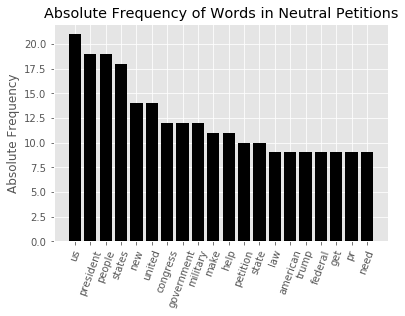

In [16]:
df = pd.DataFrame.from_dict(neutral_counts, orient='index').reset_index()
df = df.sort_values(by=0, ascending=False)

word = list(df.ix[:,0])[0:20]
count = list(df.ix[:,1])[0:20]

word_indices = np.arange(20) # ORDERED INDICES

# PLOTTING
plt.bar(word_indices, count, color="black")
plt.xticks(word_indices, word, rotation=70)
plt.ylabel("Absolute Frequency")
plt.title("Absolute Frequency of Words in Neutral Petitions")
    
plt.show()

In [17]:
liberal_blobs = " ".join([x for x in blobs_df[blobs_df["ideology"] == "Liberal"]["blobs"]])
liberal_counts = Counter(liberal_blobs.split())
liberal_counts.most_common()[0:20]

[(u'president', 76),
 (u'people', 67),
 (u'trump', 62),
 (u'us', 62),
 (u'states', 56),
 (u'order', 46),
 (u'united', 46),
 (u'american', 45),
 (u'national', 39),
 (u'executive', 37),
 (u'rights', 33),
 (u'country', 33),
 (u'americans', 32),
 (u'climate', 32),
 (u'would', 30),
 (u'administration', 30),
 (u'change', 28),
 (u'public', 26),
 (u'donald', 25),
 (u'petition', 24)]

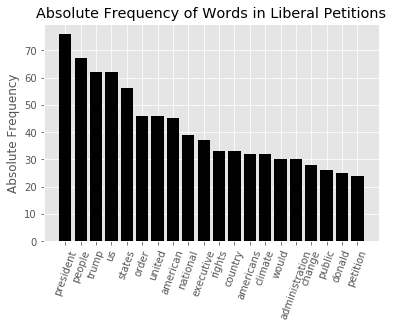

In [18]:
df = pd.DataFrame.from_dict(liberal_counts, orient='index').reset_index()
df = df.sort_values(by=0, ascending=False)

word = list(df.ix[:,0])[0:20]
count = list(df.ix[:,1])[0:20]

word_indices = np.arange(20) # ORDERED INDICES

## PLOTTING
plt.bar(word_indices, count, color="black")
plt.xticks(word_indices, word, rotation=70)
plt.ylabel("Absolute Frequency")
plt.title("Absolute Frequency of Words in Liberal Petitions")
    
plt.show()

In [19]:
conservative_blobs = " ".join([x for x in blobs_df[blobs_df["ideology"] == "Conservative"]["blobs"]])
conservative_counts = Counter(conservative_blobs.split())
conservative_counts.most_common()[0:20]

[(u'us', 50),
 (u'people', 39),
 (u'president', 34),
 (u'law', 34),
 (u'states', 33),
 (u'trump', 27),
 (u'state', 27),
 (u'united', 26),
 (u'government', 22),
 (u'amendment', 21),
 (u'citizens', 20),
 (u'firearms', 20),
 (u'petition', 19),
 (u'national', 19),
 (u'would', 17),
 (u'american', 17),
 (u'rights', 16),
 (u'police', 16),
 (u'time', 15),
 (u'years', 15)]

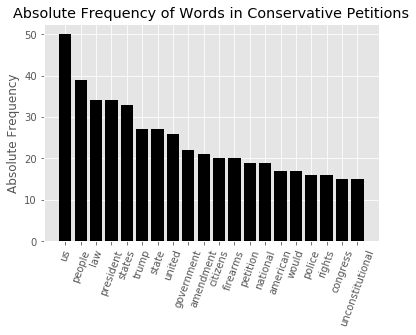

In [20]:
df = pd.DataFrame.from_dict(conservative_counts, orient='index').reset_index()
df = df.sort_values(by=0, ascending=False)

word = list(df.ix[:,0])[0:20]
count = list(df.ix[:,1])[0:20]

word_indices = np.arange(20) # ORDERED INDICES

## PLOTTING
plt.bar(word_indices, count, color="black")
plt.xticks(word_indices, word, rotation=70)
plt.ylabel("Absolute Frequency")
plt.title("Absolute Frequency of Words in Conservative Petitions")
    
plt.show()

<font color="navy">
## (5) Need to Remove Most Popular Words
We don't want them to all have the same top words.

In [96]:
all_blobs = " ".join([x for x in blobs_df["blobs"]])
all_counts = Counter(all_blobs.split())
# all_counts.most_common()[0:50]

<font color="navy">
I need to make an informed decision on more stop words. I feel strongly that these words do not need to be included in our corpus.
<br>
<br>
<b>New Additions:</b> us, people, american, national, government, petition, make, also, many, must, need, change, ask, use

In [97]:
new_stops = '''
            president, without, needs, since, used, get, would, us, united, states, 
            people, american, americans, national, government, petition, make, also, 
            many, must, need, change, ask, use, every, trump, white, house, america,
            executive
            '''
new_stops = new_stops.split(", ")

In [98]:
def removeStopWords(text):
    return [word for word in text.split() if word not in new_stops]

In [99]:
new_blobs = [" ".join(removeStopWords(x)) for x in blobs_df["blobs"]]

In [100]:
blobs_df["new_blobs"] = new_blobs
blobs_df.head()

,blobs,ideology,title,new_blobs
0,effects every american way also keep americans...,Liberal,legalize marijuana and bring jobs to millions ...,effects way keep funding terrorism drug cartel...
1,dying days ottoman empire cover world war youn...,Neutral,officially recognize the armenian genocide of,dying days ottoman empire cover world war youn...
2,walleye political pawns mille lacs lakewhile n...,Neutral,eliminate mille lacs lake treaty management,walleye political pawns mille lacs lakewhile n...
3,cannot make america great many disabled autist...,Conservative,take action to end the autism epidemic and imp...,cannot america great many disabled autistic ch...
4,locked us government years prison exercising c...,Neutral,release kevin trudeau,locked years prison exercising constitutional ...


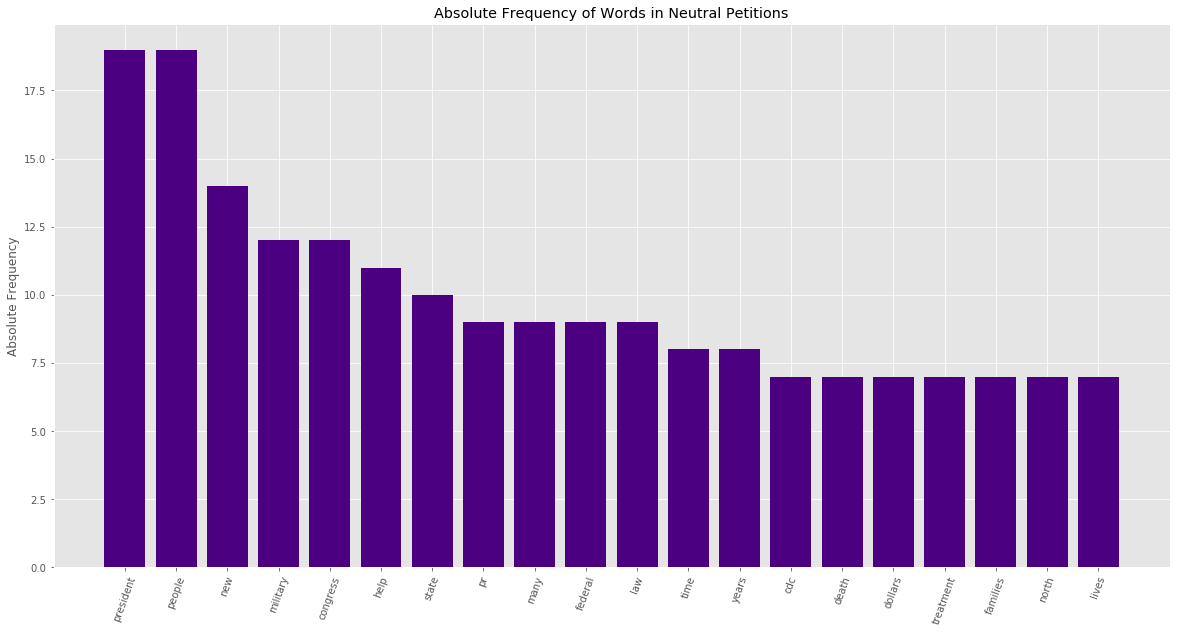

In [26]:
# NEUTRAL WORDS
neutral_blobs2 = " ".join([x for x in blobs_df[blobs_df["ideology"] == "Neutral"]["new_blobs"]])
neutral_counts2 = Counter(neutral_blobs2.split())
neutral_counts2.most_common()[0:20]

df = pd.DataFrame.from_dict(neutral_counts2, orient='index').reset_index()
df = df.sort_values(by=0, ascending=False)

word = list(df.ix[:,0])[0:20]
count = list(df.ix[:,1])[0:20]

word_indices = np.arange(20) # ORDERED INDICES

# PLOTTING
plt.figure(figsize=(20,10))
plt.bar(word_indices, count, color="indigo")
plt.xticks(word_indices, word, rotation=70)
plt.ylabel("Absolute Frequency")
plt.title("Absolute Frequency of Words in Neutral Petitions")
    
plt.show()

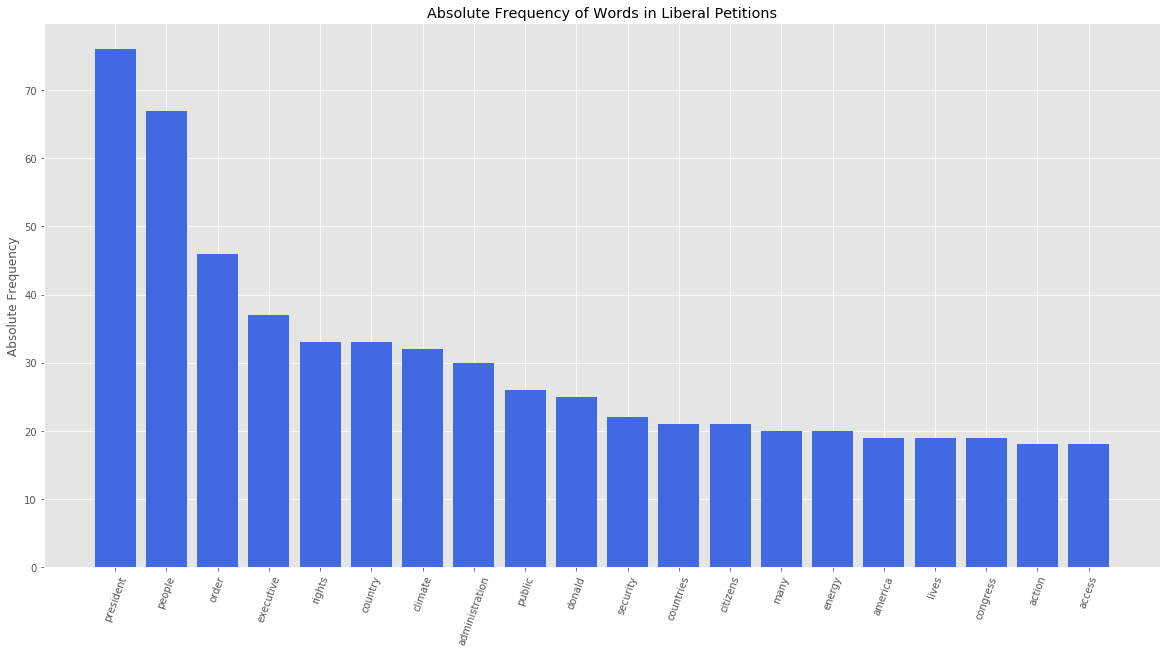

In [27]:
# LIBERAL WORDS
liberal_blobs2 = " ".join([x for x in blobs_df[blobs_df["ideology"] == "Liberal"]["new_blobs"]])
liberal_counts2 = Counter(liberal_blobs2.split())
liberal_counts2.most_common()[0:20]

df = pd.DataFrame.from_dict(liberal_counts2, orient='index').reset_index()
df = df.sort_values(by=0, ascending=False)

word = list(df.ix[:,0])[0:20]
count = list(df.ix[:,1])[0:20]

word_indices = np.arange(20) # ORDERED INDICES

# PLOTTING
plt.figure(figsize=(20,10))
plt.bar(word_indices, count, color="royalblue")
plt.xticks(word_indices, word, rotation=70)
plt.ylabel("Absolute Frequency")
plt.title("Absolute Frequency of Words in Liberal Petitions")
    
plt.show()

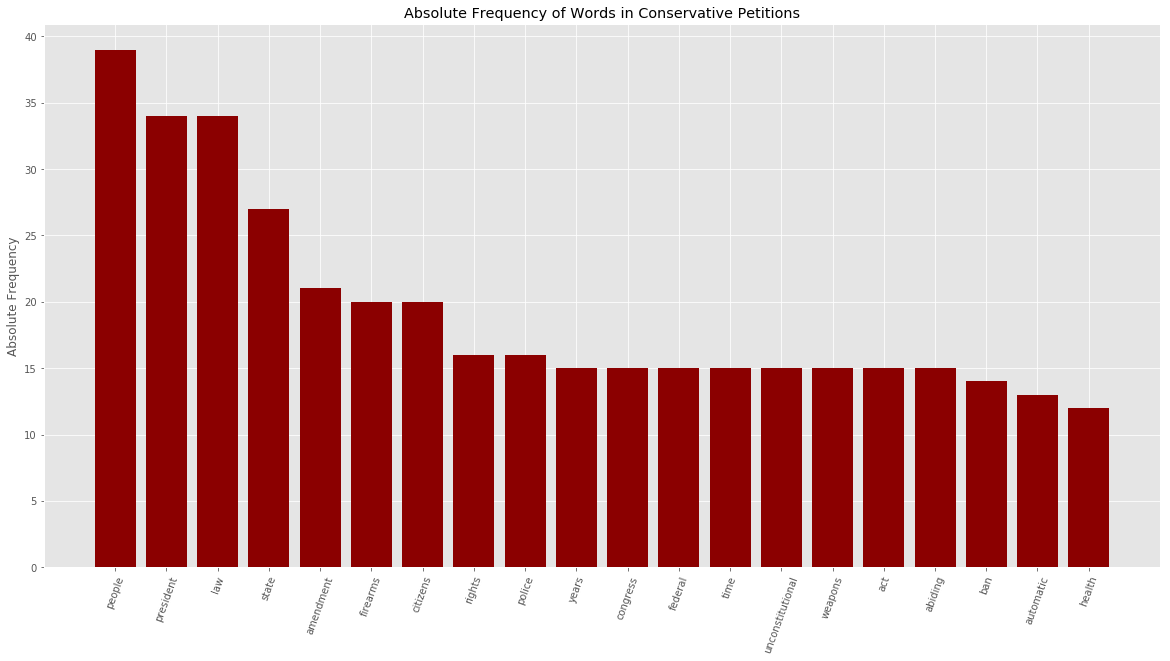

In [28]:
# CONSERVATIVE
conservative_blobs2 = " ".join([x for x in blobs_df[blobs_df["ideology"] == "Conservative"]["new_blobs"]])
conservative_counts2 = Counter(conservative_blobs2.split())
conservative_counts2.most_common()[0:20]

df = pd.DataFrame.from_dict(conservative_counts2, orient='index').reset_index()
df = df.sort_values(by=0, ascending=False)

word = list(df.ix[:,0])[0:20]
count = list(df.ix[:,1])[0:20]

word_indices = np.arange(20) # ORDERED INDICES

# PLOTTING
plt.figure(figsize=(20,10))
plt.bar(word_indices, count, color="darkred")
plt.xticks(word_indices, word, rotation=70)
plt.ylabel("Absolute Frequency")
plt.title("Absolute Frequency of Words in Conservative Petitions")
    
plt.show()

<font color="navy">
## (6) Testing Vectorizer Code
Source: https://www.youtube.com/watch?v=AJVP96tAWxw

In [155]:
# import random
# pseudo_rando_nums = random.sample(range(0, len(blobs_df)), 132)
# print pseudo_rando_nums

train = [211, 103, 145, 161, 111, 78, 146, 0, 69, 6, 170, 142, 224, 150, 58, 151, 93, 188, 255, 219, 243, 110, 189, 164, 165, 45, 97, 72, 108, 135, 138, 10, 214, 126, 210, 200, 96, 190, 80, 185, 206, 21, 157, 193, 7, 134, 88, 168, 20, 187, 105, 160, 109, 85, 195, 122, 186, 53, 82, 236, 221, 131, 253, 62, 194, 198, 56, 155, 106, 207, 117, 203, 144, 137, 59, 228, 230, 33, 113, 37, 127, 23, 179, 1, 262, 232, 90, 30, 29, 254, 44, 178, 208, 227, 249, 133, 252, 28, 98, 34, 209, 141, 199, 41, 244, 38, 60, 36, 156, 184, 159, 25, 27, 71, 241, 261, 107, 174, 217, 77, 35, 26, 128, 31, 94, 14, 24, 245, 212, 172, 46, 84]

In [156]:
# VECTORIZING TRAINING DATA
vectorizer = CountVectorizer(analyzer= "word",
                            tokenizer = None,
                            preprocessor = None,
                            stop_words = None,
                            max_features = 5000)
train_data_features = vectorizer.fit_transform(blobs_df["new_blobs"][train])
train_data_features = train_data_features.toarray()
train_data_features

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ..., 
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [157]:
# GENERATE OUR FOREST
forest = RandomForestClassifier(n_estimators = 100)
our_forest = forest.fit(train_data_features, blobs_df["ideology"][train])

In [158]:
# GET INDICES OF TEST DATA
test = set(range(len(blobs_df))) - set(train)
test = list(test)
print test

[2, 3, 4, 5, 8, 9, 11, 12, 13, 15, 16, 17, 18, 19, 22, 32, 39, 40, 42, 43, 47, 48, 49, 50, 51, 52, 54, 55, 57, 61, 63, 64, 65, 66, 67, 68, 70, 73, 74, 75, 76, 79, 81, 83, 86, 87, 89, 91, 92, 95, 99, 100, 101, 102, 104, 112, 114, 115, 116, 118, 119, 120, 121, 123, 124, 125, 129, 130, 132, 136, 139, 140, 143, 147, 148, 149, 152, 153, 154, 158, 162, 163, 166, 167, 169, 171, 173, 175, 176, 177, 180, 181, 182, 183, 191, 192, 196, 197, 201, 202, 204, 205, 213, 215, 216, 218, 220, 222, 223, 225, 226, 229, 231, 233, 234, 235, 237, 238, 239, 240, 242, 246, 247, 248, 250, 251, 256, 257, 258, 259, 260, 263]


In [159]:
# VECTORIZING TEST DATA
test_data_features = vectorizer.transform(blobs_df["new_blobs"][test])
test_data_features = test_data_features.toarray()
test_data_features

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [160]:
# PREDICT
result = forest.predict(test_data_features)

In [161]:
pred_df = pd.DataFrame({"petition":blobs_df["title"][test], "true_ideol":blobs_df["ideology"][test], "pred_ideol":result})
pred_df = pred_df.reindex()

In [162]:
pred_df["correct"] = (pred_df["pred_ideol"] == pred_df["true_ideol"])

In [163]:
pred_df

,petition,pred_ideol,true_ideol,correct
2,eliminate mille lacs lake treaty management,Liberal,Neutral,False
3,take action to end the autism epidemic and imp...,Liberal,Conservative,False
4,release kevin trudeau,Liberal,Neutral,False
5,make marijuana legalization for recreation or ...,Liberal,Liberal,True
8,exempt department of defense nonappropriated f...,Liberal,Neutral,False
9,we strongly protest exclusion of news orgs. fr...,Liberal,Liberal,True
11,allow all press outlets in white house press b...,Liberal,Liberal,True
12,reduce hunger in our students by reducing rest...,Liberal,Liberal,True
13,need to hear govt stand on kansas shooting of ...,Liberal,Liberal,True
15,"need a statement from president trump, on the ...",Liberal,Liberal,True


In [164]:
# ERROR RATE
len(pred_df[pred_df["correct"]==False])*(len(pred_df)**(-1))

0.3787878787878788